<a href="https://colab.research.google.com/github/lawbaker/MIMIC-Glucose-Management/blob/master/03_OR_Dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operations Research 2021 TA Session 4: Dataframes and Plots

## Lawrence Baker

## Sessions
1.   An introduction to python (and colab)
2.   Linear algebra & unconstrained convex optimization problems
3.   Constraints and integer programming
4.   **Dataframes and Plotting**
5.   An introduction to machine learning

## Acknowledgements

Parts of this session are based off a Tutorial by Greg Reda, that can be found [here](http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/)

## Import packages

The package for dataframes in python is called pandas. We'll also read in numpy and plotting functions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Intro to Pandas

## Reading in Data

We're using .csv files, which means we need to use the pd.read_csv() function. There are other reading in functions including:

*   Excel (pd.read_excel)
*   SQL (pd.read_sql)
*   Your clipboard (pd.read_clipboard)
*   URLs (pd.read_table)

And more, if you want to read a file in, there will likely be a way and you should consult the docs and stackoverflow for help.


The docs for [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) show all the options. A few notable ones:

* **delimiter** - The delimiter in the file (in CSVs these are normally commas)
* **header** - The row that contains column names
* **index_col** - The column that contains row names / index
* **skip_rows** - the index of rows to skip
* **na_values** - strings to recognize as NAs
* **skip_blank_lines** - whether to skip blank lines (or have them read as NAs)


Let's read in google's example data that comes with colab, on California housing

In [ ]:
houses = pd.read_csv('sample_data/california_housing_train.csv')
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


The automatic data preview generated by colab is quite useful. It shows us the first 5 rows, the last 5 rows, and the shape (number of rows and columns). Fortunately, all the columns can easily be displayed.

If we wanted to do these thing ourselves then we could use some methods/attributes (head, tail, and shape).

In [ ]:
#first 4 rows
houses.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0


In [ ]:
#last 7 rows
houses.tail(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:
#shape
houses.shape

(17000, 9)

In addition, it can be useful to find the datatypes in your dataframe - in this case all numbers (because google probably wants this example to be used in machine learning.

In [ ]:
houses.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

You can also quickly produce summary statistics on all your numeric columns. I almost never use this, I'd rather visualize the data, but some people find it handy. It can be useful for finding outliers or special codes.

In [ ]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Selection

The most basic form of selection in dataframes mirrors arrays, in that you can select by row and column number. **I do not suggest using this method of selection**, but for the sake of completeness here it is. Many people will initally use this method, but it can lead to very confusing results, essentially because it produces a copy of a dataframe, when we often want a view. Where possible [you should use .loc and .iloc](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) (introduced below)

In [ ]:
#First six rows
houses[0:7]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


### Selecting columns

The best way to select columns is by name

In [ ]:
houses['housing_median_age']

0        15.0
1        19.0
2        17.0
3        14.0
4        20.0
         ... 
16995    52.0
16996    36.0
16997    17.0
16998    19.0
16999    52.0
Name: housing_median_age, Length: 17000, dtype: float64

You can also subset using the attribute notation, but this is not recommended, because it won't work with certain names (e.g. if you have a space in the name)

In [ ]:
houses.housing_median_age

0        15.0
1        19.0
2        17.0
3        14.0
4        20.0
         ... 
16995    52.0
16996    36.0
16997    17.0
16998    19.0
16999    52.0
Name: housing_median_age, Length: 17000, dtype: float64

We can also subset rows for these columns in the same way. Because these are effectively independent subsetting operations, we can do them in either order.

In [ ]:
houses['housing_median_age'][1:7]

1    19.0
2    17.0
3    14.0
4    20.0
5    29.0
6    25.0
Name: housing_median_age, dtype: float64

In [ ]:
houses[1:7]['housing_median_age']

1    19.0
2    17.0
3    14.0
4    20.0
5    29.0
6    25.0
Name: housing_median_age, dtype: float64

You will notice that the output format has shifted slightly when we output a single column. That's because this is a different datastructure to the **dataframe**, this is a **series**.

You can think of a series as a single column of a dataframe, and a dataframe as being composed of series. A series has a different set of methods than a dataframe, because there are things you would want to do to a single column that you might not want to do to a whole dataframe.

We can also select groups of columns, in which case the output is a dataframe. When we make this selection, we need to make sure we are calling them in a list (inside the square brackets used for indexing). The columns will be returned in the order we call them, regardless of the order in the original dataframe, which also means that you can use this for reordering.

In [ ]:
houses[['total_rooms', 'population', 'latitude']]

,total_rooms,population,latitude
0,5612.0,1015.0,34.19
1,7650.0,1129.0,34.40
2,720.0,333.0,33.69
3,1501.0,515.0,33.64
4,1454.0,624.0,33.57
...,...,...,...
16995,2217.0,907.0,40.58
16996,2349.0,1194.0,40.69
16997,2677.0,1244.0,41.84
16998,2672.0,1298.0,41.80


Below shows how one might flip the column order (if you wanted to). To do this succinctly, and in a way that scales well, we can use the .columns attributed to access an index of column names.

In [ ]:
#index of column names
houses_column_names = houses.columns

#convert to a list
houses_column_names = list(houses_column_names)

#flip it
houses_column_names.reverse()

#call houses with the reversed names
houses[houses_column_names]

,median_house_value,median_income,households,population,total_bedrooms,total_rooms,housing_median_age,latitude,longitude
0,66900.0,1.4936,472.0,1015.0,1283.0,5612.0,15.0,34.19,-114.31
1,80100.0,1.8200,463.0,1129.0,1901.0,7650.0,19.0,34.40,-114.47
2,85700.0,1.6509,117.0,333.0,174.0,720.0,17.0,33.69,-114.56
3,73400.0,3.1917,226.0,515.0,337.0,1501.0,14.0,33.64,-114.57
4,65500.0,1.9250,262.0,624.0,326.0,1454.0,20.0,33.57,-114.57
...,...,...,...,...,...,...,...,...,...
16995,111400.0,2.3571,369.0,907.0,394.0,2217.0,52.0,40.58,-124.26
16996,79000.0,2.5179,465.0,1194.0,528.0,2349.0,36.0,40.69,-124.27
16997,103600.0,3.0313,456.0,1244.0,531.0,2677.0,17.0,41.84,-124.30
16998,85800.0,1.9797,478.0,1298.0,552.0,2672.0,19.0,41.80,-124.30


### .loc or selection by label

Most of the time we are working, we want to be able to select elements of a dataframe by their names. Their names are the column index (shown along the top in bold) and their row index (shown along the side in bold). In this example the row index is the same as the position, but it doesn't have to be. Both column and row indices must be unique.

.loc has very similar formatting to our array syntax:

```
df.loc[rows, columns]
```





So selecting a few rows and the corresponding columns would look like this:

In [ ]:
houses.loc[[1, 5, 7, 232], ['total_rooms', 'population', 'latitude']]

,total_rooms,population,latitude
1,7650.0,1129.0,34.40
5,1387.0,671.0,33.63
7,812.0,375.0,34.83
232,9425.0,1711.0,33.79


Better, and more useful, we can select ranges of columns or rows, by name:

In [ ]:
houses.loc[7:22,'housing_median_age':'median_income']

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7,41.0,812.0,168.0,375.0,158.0,1.7083
8,34.0,4789.0,1175.0,3134.0,1056.0,2.1782
9,46.0,1497.0,309.0,787.0,271.0,2.1908
10,16.0,3741.0,801.0,2434.0,824.0,2.6797
11,21.0,1988.0,483.0,1182.0,437.0,1.6250
12,48.0,1291.0,248.0,580.0,211.0,2.1571
13,31.0,2478.0,464.0,1346.0,479.0,3.2120
14,15.0,1448.0,378.0,949.0,300.0,0.8585
15,17.0,2556.0,587.0,1005.0,401.0,1.6991
16,28.0,1678.0,322.0,666.0,256.0,2.9653


Finally, loc is incredibly useful for selecting by condition. This is because condition statements will generate boolean arrays, and .loc can take this as an argument.

In [ ]:
houses['median_income'] > 1.5

0        False
1         True
2         True
3         True
4         True
         ...  
16995     True
16996     True
16997     True
16998     True
16999     True
Name: median_income, Length: 17000, dtype: bool

In [ ]:
#Houses where the median income is greater than 1.5
houses.loc[houses['median_income'] > 2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0
...,...,...,...,...,...,...,...,...,...
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


In [ ]:
#Houses where the median income is greater than 1.5, only returning some columns
houses.loc[houses['median_income'] > 1.5, 'housing_median_age':'households']

,housing_median_age,total_rooms,total_bedrooms,population,households
1,19.0,7650.0,1901.0,1129.0,463.0
2,17.0,720.0,174.0,333.0,117.0
3,14.0,1501.0,337.0,515.0,226.0
4,20.0,1454.0,326.0,624.0,262.0
5,29.0,1387.0,236.0,671.0,239.0
...,...,...,...,...,...
16995,52.0,2217.0,394.0,907.0,369.0
16996,36.0,2349.0,528.0,1194.0,465.0
16997,17.0,2677.0,531.0,1244.0,456.0
16998,19.0,2672.0,552.0,1298.0,478.0


In [ ]:
#Houses whete the latitude is more than 40, and the median house value is less than 100,000
houses.loc[(houses['latitude'] > 40) & (houses['median_house_value'] < 100000)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10315,-120.08,41.79,34.0,1355.0,262.0,434.0,178.0,2.0903,56100.0
10348,-120.12,41.40,33.0,2820.0,515.0,976.0,403.0,2.6062,52600.0
10388,-120.20,40.26,26.0,2399.0,518.0,1037.0,443.0,2.6765,47600.0
10461,-120.37,40.17,21.0,789.0,141.0,406.0,146.0,2.1198,73500.0
10470,-120.38,40.98,27.0,777.0,185.0,318.0,115.0,1.6833,40000.0
...,...,...,...,...,...,...,...,...,...
16992,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
#Houses whete the latitude is more than 40, or the median house value is less than 100,000
houses.loc[(houses['latitude'] > 40) | (houses['median_house_value'] < 100000)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### .iloc or selection by position

.iloc is the preferred method for selecting by position. Again, it uses array syntax. I find this method less useful than .loc, but exactly the same as array slicing:



In [ ]:
#houses.iloc[:, 1:-1:2].loc[54:57]['state']

In [ ]:
houses.drop('latitude', axis = 1)

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...
16995,-124.26,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


If you leave things blank, then iloc will assume steps of one, from beginning to end.

In [ ]:
houses.iloc[:7, 4:]

,total_bedrooms,population,households,median_income,median_house_value
0,1283.0,1015.0,472.0,1.4936,66900.0
1,1901.0,1129.0,463.0,1.8200,80100.0
2,174.0,333.0,117.0,1.6509,85700.0
3,337.0,515.0,226.0,3.1917,73400.0
4,326.0,624.0,262.0,1.9250,65500.0
5,236.0,671.0,239.0,3.3438,74000.0
6,680.0,1841.0,633.0,2.6768,82400.0


## Adding (or removing) columns (and rows)

Sometimes we want to add columns to dataset, either by defining a value, or calculating the new value from other columns. For instance, we might want to add column called state that reads California for every entry in this table (perhpas because we might be combining with other tables).

In [ ]:
houses['state'] = 'California   '
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,state
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,California
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,California
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,California
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,California
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,California
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,California
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,California
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,California
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,California


We might also want to calculate something from the columns, such as the ratio of average income to average house value, and the average number of rooms per house.

In [ ]:
houses['value_income_ratio'] = houses['median_income']/houses['median_house_value']
houses['rooms_per_house'] = houses['total_rooms']/houses['households']
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,state,value_income_ratio,rooms_per_house
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,California,0.000022,11.889831
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,California,0.000023,16.522678
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,California,0.000019,6.153846
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,California,0.000043,6.641593
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,California,0.000029,5.549618
...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,California,0.000021,6.008130
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,California,0.000032,5.051613
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,California,0.000029,5.870614
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,California,0.000023,5.589958


In [ ]:
houses['populatiom'] = houses['population']  * 1.05

houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,state,value_income_ratio,rooms_per_house,populatiom
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,California,0.000022,11.889831,1065.75
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,California,0.000023,16.522678,1185.45
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,California,0.000019,6.153846,349.65
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,California,0.000043,6.641593,540.75
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,California,0.000029,5.549618,655.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,California,0.000021,6.008130,952.35
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,California,0.000032,5.051613,1253.70
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,California,0.000029,5.870614,1306.20
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,California,0.000023,5.589958,1362.90


### Dropping

On second look, the value income ratio is a little silly, because they are using some kind of normalized ratio. Let's drop this.

We can use [pandas.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). As with many pandas methods, we need to remember to use assignment to save the result (otherwise we are just previewing what the change would look like without making it). We also need to specify the axis, since by default pandas looks to drop rows rather than columns. If we wanted, we could drop multiple columns by using a list.

In [ ]:
houses = houses.drop(['value_income_ratio'], axis = 1)

We could also specify dropping rows. This is done by specifying labels (not positions). Here I drop the first 5 rows (but I don't save the change)

In [ ]:
houses.drop(range(5))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,state,rooms_per_house,populatiom
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,California,5.803347,704.55
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,California,4.592417,1933.05
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,California,5.139241,393.75
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,California,4.535038,3290.70
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,California,5.523985,826.35
...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,California,6.008130,952.35
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,California,5.051613,1253.70
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,California,5.870614,1306.20
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,California,5.589958,1362.90


Note now that iloc and loc produce different results because the index no longer matches the position

In [ ]:
houses.drop(range(5)).loc[6:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,state,rooms_per_house,populatiom
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,California,4.592417,1933.05
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,California,5.139241,393.75
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,California,4.535038,3290.70
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,California,5.523985,826.35
10,-114.60,33.62,16.0,3741.0,801.0,2434.0,824.0,2.6797,86500.0,California,4.540049,2555.70


In [ ]:
houses.drop(range(5)).iloc[6:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,state,rooms_per_house,populatiom
11,-114.60,33.60,21.0,1988.0,483.0,1182.0,437.0,1.6250,62000.0,California,4.549199,1241.10
12,-114.61,34.84,48.0,1291.0,248.0,580.0,211.0,2.1571,48600.0,California,6.118483,609.00
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0,California,5.173278,1413.30
14,-114.63,32.76,15.0,1448.0,378.0,949.0,300.0,0.8585,45000.0,California,4.826667,996.45


### String operations

There is a whole set of different operations available on strings. These are generally accessed through the [.str methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

As we can see below, I introduced some ungainly whitespace in our state column. This can often be a problem when reading in data.

In [ ]:
#First element of the state series
houses['state'][0]

'California   '

We can remove leading or trailing whitespace using the strip command.

In [ ]:
houses['state'].str.strip()
houses['state'][0]

'California   '

In [ ]:
houses['state'] = houses['state'].str.strip()
houses['state'][0]

'California'

Similarly we could check the length of things in the state column to make sure there are the right number of letters

In [ ]:
houses['state'].str.len()

0        10
1        10
2        10
3        10
4        10
         ..
16995    10
16996    10
16997    10
16998    10
16999    10
Name: state, Length: 17000, dtype: int64

We might want to make sure we have the state abbreviation as a column too. We could type this in, or we could be fancy and define it based on the state.

We can index the string to get the first 2 letters.

In [ ]:
houses['state'].str[:2]

0        Ca
1        Ca
2        Ca
3        Ca
4        Ca
         ..
16995    Ca
16996    Ca
16997    Ca
16998    Ca
16999    Ca
Name: state, Length: 17000, dtype: object

But we would like these to be capitalized

In [ ]:
houses['state'].str[:2].str.upper()

0        CA
1        CA
2        CA
3        CA
4        CA
         ..
16995    CA
16996    CA
16997    CA
16998    CA
16999    CA
Name: state, Length: 17000, dtype: object

Now that we know we have working code, we can assign

In [ ]:
houses['state_abv'] = houses['state'].str[:2].str.upper()
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,state,rooms_per_house,populatiom,state_abv
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,California,11.889831,1065.75,CA
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,California,16.522678,1185.45,CA
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,California,6.153846,349.65,CA
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,California,6.641593,540.75,CA
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,California,5.549618,655.20,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,California,6.008130,952.35,CA
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,California,5.051613,1253.70,CA
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,California,5.870614,1306.20,CA
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,California,5.589958,1362.90,CA


## Sorting

We can easily sort dataframes by multpiple columns using [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html).

In [ ]:
houses.sort_values(by = ['rooms_per_house', 'median_house_value'], ascending = False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,state,rooms_per_house,populatiom,state_abv
10339,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,California,141.909091,31.5,CA
10317,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,California,132.533333,37.8,CA
10301,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,437500.0,California,61.812500,117.6,CA
11464,-121.25,40.27,25.0,958.0,245.0,28.0,16.0,2.6250,67500.0,California,59.875000,29.4,CA
10370,-120.16,39.01,16.0,1463.0,264.0,54.0,26.0,4.9750,206300.0,California,56.269231,56.7,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13206,-121.90,37.37,20.0,78.0,72.0,120.0,69.0,1.0938,187500.0,California,1.130435,126.0,CA
1102,-117.11,32.68,36.0,26.0,14.0,58.0,23.0,1.9107,125000.0,California,1.130435,60.9,CA
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,California,1.000000,6.3,CA
6002,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,California,0.888889,100.8,CA


## SettingWithCopyWarning (Assignment and Selection)

You might think that SettingWithCopyWarning is your enemy, but really they are your friend. It's telling you that you are doing something called chained assignment - that the changes you think you are making are not tracking back to the object you think you are making them on.

We solve this by always using .loc or .iloc for assignment.

In [ ]:
df = pd.DataFrame(np.random.rand(10,3), columns = ['A', 'B', 'C'])
df

,A,B,C
0,0.349409,0.169581,0.250799
1,0.350188,0.442506,0.354819
2,0.509893,0.797799,0.149704
3,0.936380,0.590869,0.791890
4,0.754704,0.054206,0.557956
5,0.699149,0.139182,0.191889
6,0.843730,0.392270,0.441084
7,0.660153,0.974082,0.017733
8,0.305827,0.973211,0.305714
9,0.529169,0.510636,0.639005


In [ ]:
df[df['A'] > 0.5]['B'] = '!HI!'
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,A,B,C
0,0.349409,0.169581,0.250799
1,0.350188,0.442506,0.354819
2,0.509893,0.797799,0.149704
3,0.936380,0.590869,0.791890
4,0.754704,0.054206,0.557956
5,0.699149,0.139182,0.191889
6,0.843730,0.392270,0.441084
7,0.660153,0.974082,0.017733
8,0.305827,0.973211,0.305714
9,0.529169,0.510636,0.639005


In [ ]:
df.loc[df['A'] > 0.5, 'B'] = '!HELLO!'
df

,A,B,C
0,0.349409,0.169581,0.250799
1,0.350188,0.442506,0.354819
2,0.509893,!HELLO!,0.149704
3,0.936380,!HELLO!,0.791890
4,0.754704,!HELLO!,0.557956
5,0.699149,!HELLO!,0.191889
6,0.843730,!HELLO!,0.441084
7,0.660153,!HELLO!,0.017733
8,0.305827,0.973211,0.305714
9,0.529169,!HELLO!,0.639005


In [ ]:
#Does not work - DON'T USE FOR ASSIGNMENT
df[df['A'] > 0.5]['B'] = '!HI!'    
df.loc[df['A'] > 0.5]['B'] = '!HI!'   

#Technically works, but is bad for other reasons- DON'T USE FOR ASSIGNMENT
df['B'][df['A'] > 0.5] = '!HI!'  

#Do this one.
df.loc[df['A'] > 0.5, 'B'] = '!HI!'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [ ]:
df.set_index('A')

,B,C
A,,
0.349409,0.169581,0.250799
0.350188,0.442506,0.354819
0.509893,!HI!,0.149704
0.936380,!HI!,0.791890
0.754704,!HI!,0.557956
0.699149,!HI!,0.191889
0.843730,!HI!,0.441084
0.660153,!HI!,0.017733
0.305827,0.973211,0.305714


## Other useful functions / methods

This is essentially all there is to the basics of dataframes. A few other functions (that have self explanatory names), but don't make sense to use here.

* [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) - drop na values
* [set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) - set one of the columns as an index
* [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) - remove duplicate entries (based on columns you specify)
* [map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html?) - Specify a dictionary to map values from one set to another
* [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) - smush dataframes together, either horizontally (shared rows) or vertically (shared columns)
* [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) (coming up) - join dataframes on specified columns or indexes
* [.copy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) - duplicates a dataframe if you want to do something weird to it without messing up the original.

Now, I'll demonstrate these techniques (and a few others on a different dataset)

# A More advanced guide

[Effective Pandas by Tom Augspurger](https://github.com/TomAugspurger/effective-pandas) looks like it would be great for those who want to go beyond the scope of this notebook, particularly [method chaining](https://github.com/TomAugspurger/effective-pandas/blob/master/modern_2_method_chaining.ipynb).

# Movie Lens Data Analysis

## Questions

This is a random dataset I found when browsing pandas tutorials. I thought it looked fun to play around with. I decided to try and answer a few questions:

* What is the correlation between genres?
* What genres are rated most highly?
* Do opinions of films tend to improve or diminish after release?

We're not going to be answering these in a statistically rigorous way (i.e. regression analysis), but questions are useful starting points for plots

##Uploading files to colab

Normally we would read files off our hard drive, but because Colab is running an instance which isn't on our PC, we need to upload the files to be able to access them.

Click the folder icon on the right-hand side of the screen, then click the upload button (sheet with an arrow pointing up).

Upload:
*   movies.csv
*   ratings.csv

You can find the files here: https://grouplens.org/datasets/movielens/

The correct files are in the 'recommended for education and development' category



In [ ]:
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Tidying Columns

### Movies

Looking at the movies dataset, I don't like a couple of these columns. First I'd like to split out year from the title. Second I'd like to have the genres saved as something more interpretable

Let's address the year first.


In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


We can see that the year is always 4 digits long, at the end and surrounded by brackets. So we can grab the movies by going from the second to last index (-1) to the 5th from last index (-5)

In [ ]:
movies['title'].str[-5:-1]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: title, Length: 9742, dtype: object

Similarly the title is just the parts of the string that exclude this:

In [ ]:
movies['title'].str[:-7]

0                                Toy Story
1                                  Jumanji
2                         Grumpier Old Men
3                        Waiting to Exhale
4              Father of the Bride Part II
                       ...                
9737    Black Butler: Book of the Atlantic
9738                 No Game No Life: Zero
9739                                 Flint
9740          Bungo Stray Dogs: Dead Apple
9741          Andrew Dice Clay: Dice Rules
Name: title, Length: 9742, dtype: object

Let's assign. I need to do the year first, because I'm going to assign over the top of the title.

In [ ]:
movies['year'] = movies['title'].str[-5:-1]
movies['title'] = movies['title'].str[:-7]
movies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


Okay, next lets attack the genres. First I'm going to count how many genres the movie with the most genres has, so I can see if it's feasible to put them in their own columns.

In [ ]:
#Note that the '|' has a special meaning, so I have to escape it first using '\' so that
#python knows I mean that character
movies['genres'].str.count('\|').sort_values(ascending = False)+1

7441    10
5556     8
2250     7
1390     7
3460     7
        ..
4473     1
4472     1
4470     1
4465     1
4870     1
Name: genres, Length: 9742, dtype: int64

So the movie with most genres has 9 genres. I feel okay splitting that into columns. Another option would be turning that column into a list, but datastructures within datastructures I find a little confusing.

In [ ]:
movies['genres'].str.split('\|', expand = True)

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
9737,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,Drama,None,None,None,None,None,None,None,None,None
9740,Action,Animation,None,None,None,None,None,None,None,None


This looks like the result we want, so I'm going to concantenate it to the dataframe, after renaming the columns

In [ ]:
genres = movies['genres'].str.split('\|', expand = True)

for col in genres.columns:
  rename_string = 'genre_' + str(col + 1)
  genres = genres.rename({col : rename_string}, axis = 1)

genres

,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
9737,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,Drama,None,None,None,None,None,None,None,None,None
9740,Action,Animation,None,None,None,None,None,None,None,None


In [ ]:
movies = pd.concat([movies, genres], axis = 1)
movies

,movieId,title,genres,year,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji,Adventure|Children|Fantasy,1995,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,193585,Flint,Drama,2017,Drama,None,None,None,None,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018,Action,Animation,None,None,None,None,None,None,None,None


This still isn't a great format for genres, it would be much better to have a series of dummies for each genres. Before we do that, let's see how many columns that might entail by counting all unique genres.

To do this I'm going to select the genre columns, get an array of their values (using .values), and then put all of these into a single array (using .ravel), count the unique values (using unique), then find out how many unique values there are (using len)

In [ ]:
movies.loc[:,'genre_1' : 'genre_10']

,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
9737,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,Drama,None,None,None,None,None,None,None,None,None
9740,Action,Animation,None,None,None,None,None,None,None,None


In [ ]:
movies.loc[:,'genre_1' : 'genre_10'].values

array([['Adventure', 'Animation', 'Children', ..., None, None, None],
       ['Adventure', 'Children', 'Fantasy', ..., None, None, None],
       ['Comedy', 'Romance', None, ..., None, None, None],
       ...,
       ['Drama', None, None, ..., None, None, None],
       ['Action', 'Animation', None, ..., None, None, None],
       ['Comedy', None, None, ..., None, None, None]], dtype=object)

In [ ]:
movies.loc[:,'genre_1' : 'genre_10'].values.ravel()

array(['Adventure', 'Animation', 'Children', ..., None, None, None],
      dtype=object)

In [ ]:
pd.unique(movies.loc[:,'genre_1' : 'genre_10'].values.ravel())

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', None,
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [ ]:
len(pd.unique(movies.loc[:,'genre_1' : 'genre_10'].values.ravel()))

21

So there are 20 genres, because this list also includes None, which isn't a genre. That seems reasonable to make dummy columns of. Fortunately pandas again has a function that is designed just for this. [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

This works more easily with a list, so the first step is to create that

In [ ]:
movies['genres'] = movies['genres'].str.split('\|')
movies

,movieId,title,genres,year,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II,[Comedy],1995,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]",2017,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,193583,No Game No Life: Zero,"[Animation, Comedy, Fantasy]",2017,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,193585,Flint,[Drama],2017,Drama,None,None,None,None,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple,"[Action, Animation]",2018,Action,Animation,None,None,None,None,None,None,None,None


What we need to do isn't particularly easy in native pandas, so I googled the solution and found one:

https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

Essentially explode stacks the rows in a certain way, and sum combines them back again after we have got the dummies.

In [ ]:
pd.get_dummies(movies['genres'].explode()).sum(level=0)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's join this on to our dataframe

In [ ]:
genres = pd.get_dummies(movies['genres'].explode()).sum(level=0)
movies = pd.concat([movies, genres], axis = 1)
movies

,movieId,title,genres,year,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,Adventure,Children,Fantasy,None,None,None,None,None,None,None,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,Comedy,Romance,None,None,None,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,Comedy,Drama,Romance,None,None,None,None,None,None,None,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,[Comedy],1995,Comedy,None,None,None,None,None,None,None,None,None,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]",2017,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero,"[Animation, Comedy, Fantasy]",2017,Animation,Comedy,Fantasy,None,None,None,None,None,None,None,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint,[Drama],2017,Drama,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple,"[Action, Animation]",2018,Action,Animation,None,None,None,None,None,None,None,None,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can get rid of the genre binaries labels we started off with and the 

*   List item
*   List item

original genre column

In [ ]:
movies = movies.drop(movies.loc[:, 'genre_2':'genre_10'], axis=1)
movies = movies.drop(['genres'], axis=1)
movies

,movieId,title,year,genre_1,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,Adventure,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,Adventure,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,Comedy,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2017,Action,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero,2017,Animation,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint,2017,Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple,2018,Action,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I left the 'genre_1' column as we'll use this later. I'm going to rename this so it sounds fancier.

In [ ]:
movies = movies.rename({'genre_1':'primary_genre'}, axis=1)

The final change I'd like to make to this dataframe is to change the index to the movie ID. This makes more sense and will make our merging operations later easier.

In [ ]:
movies = movies.set_index('movieId')
movies

,title,year,primary_genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,Adventure,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995,Adventure,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale,1995,Comedy,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II,1995,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic,2017,Action,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,No Game No Life: Zero,2017,Animation,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,Flint,2017,Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Ratings

Fortunately the ratings dataset requires less cleaning

First, I'm going to adjust the index as we did before

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
ratings = ratings.set_index('movieId')

Next, I'd like to fix the timestamp into something we can use

In [ ]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit = 's')
ratings

,userId,rating,timestamp
movieId,,,
1,1,4.0,2000-07-30 18:45:03
3,1,4.0,2000-07-30 18:20:47
6,1,4.0,2000-07-30 18:37:04
47,1,5.0,2000-07-30 19:03:35
50,1,5.0,2000-07-30 18:48:51
...,...,...,...
166534,610,4.0,2017-05-03 21:53:22
168248,610,5.0,2017-05-03 22:21:31
168250,610,5.0,2017-05-08 19:50:47


It will also be useful to have the year the rating was given, so we can extract this too.

In [ ]:
ratings['year'] = pd.DatetimeIndex(ratings['timestamp']).year
ratings

,userId,rating,timestamp,year
movieId,,,,
1,1,4.0,2000-07-30 18:45:03,2000
3,1,4.0,2000-07-30 18:20:47,2000
6,1,4.0,2000-07-30 18:37:04,2000
47,1,5.0,2000-07-30 19:03:35,2000
50,1,5.0,2000-07-30 18:48:51,2000
...,...,...,...,...
166534,610,4.0,2017-05-03 21:53:22,2017
168248,610,5.0,2017-05-03 22:21:31,2017
168250,610,5.0,2017-05-08 19:50:47,2017


## Merging

We now have two dataframes with a common index. We want to join these, that is associate the ratings with the movies they belong to.

The syntax for this is:

```
left.merge(data = right, how = ?)
```

how has five options:
* **left** keeps all the rows in the left hand frame (and drops any in right that don't have a corresponding join)_
* **right** keeps all the rows in the right hand frame (and drops any in left that don't have a corresponding join
* **inner** keeps all the rows in both data frames (i.e. the intersection)
* **outer** keeps only the rows that have a match (i.e. the union)
* **cross** does the cartesian product, which I've never used.

For us, we want to keep all the ratings and associate the movie data. So I will use ratings as the left frame and do a left join



In [ ]:
movie_ratings = ratings.merge(movies, how = 'left', on = 'movieId', suffixes = ['_rating', '_movie'])
movie_ratings

,userId,rating,timestamp,year_rating,title,year_movie,primary_genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,4.0,2000-07-30 18:45:03,2000,Toy Story,1995,Adventure,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,4.0,2000-07-30 18:20:47,2000,Grumpier Old Men,1995,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,4.0,2000-07-30 18:37:04,2000,Heat,1995,Action,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
47,1,5.0,2000-07-30 19:03:35,2000,Seven (a.k.a. Se7en),1995,Mystery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
50,1,5.0,2000-07-30 18:48:51,2000,"Usual Suspects, The",1995,Crime,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166534,610,4.0,2017-05-03 21:53:22,2017,Split,2017,Drama,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
168248,610,5.0,2017-05-03 22:21:31,2017,John Wick: Chapter Two,2017,Action,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
168250,610,5.0,2017-05-08 19:50:47,2017,Get Out,2017,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


We can see this has the correct number of columns. We had to specify the suffixes, because there were two columns called year and pandas applies these suffixes to any column with a shared name.

The final thing we need to do is find the difference between rating year and release year. Because we left our movie year as a string, we first need to convert this. I introduce a few errors here, so I drop those columns

In [ ]:
movie_ratings['year_movie'] = pd.to_numeric(movie_ratings['year_movie'], errors = 'coerce')
movie_ratings['rating_delay'] = movie_ratings['year_rating'] - movie_ratings['year_movie']
movie_ratings = movie_ratings.dropna()
movie_ratings

,userId,rating,timestamp,year_rating,title,year_movie,primary_genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_delay
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,4.0,2000-07-30 18:45:03,2000,Toy Story,1995.0,Adventure,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5.0
3,1,4.0,2000-07-30 18:20:47,2000,Grumpier Old Men,1995.0,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.0
6,1,4.0,2000-07-30 18:37:04,2000,Heat,1995.0,Action,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,5.0
47,1,5.0,2000-07-30 19:03:35,2000,Seven (a.k.a. Se7en),1995.0,Mystery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,5.0
50,1,5.0,2000-07-30 18:48:51,2000,"Usual Suspects, The",1995.0,Crime,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166534,610,4.0,2017-05-03 21:53:22,2017,Split,2017.0,Drama,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0.0
168248,610,5.0,2017-05-03 22:21:31,2017,John Wick: Chapter Two,2017.0,Action,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
168250,610,5.0,2017-05-08 19:50:47,2017,Get Out,2017.0,Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0


We can see that we lost 30 rows out of 100k, so I'm not too worried about chasing these down

## Analysis and plots

As a reminder, these were the questions we wanted to answer:

* What is the correlation between genres?
* What genres are rated most highly?
* Do opinions of films tend to improve or diminish after release?

### Correlation between genres

We're going to be working with just movies for this one. First I'm going to select only the dummmy columns, then produce a correlation matrix, then I'm going to plot this using seaborn.

In [ ]:
genre_correlation = movies.loc[:, '(no genres listed)':].corr()
genre_correlation

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


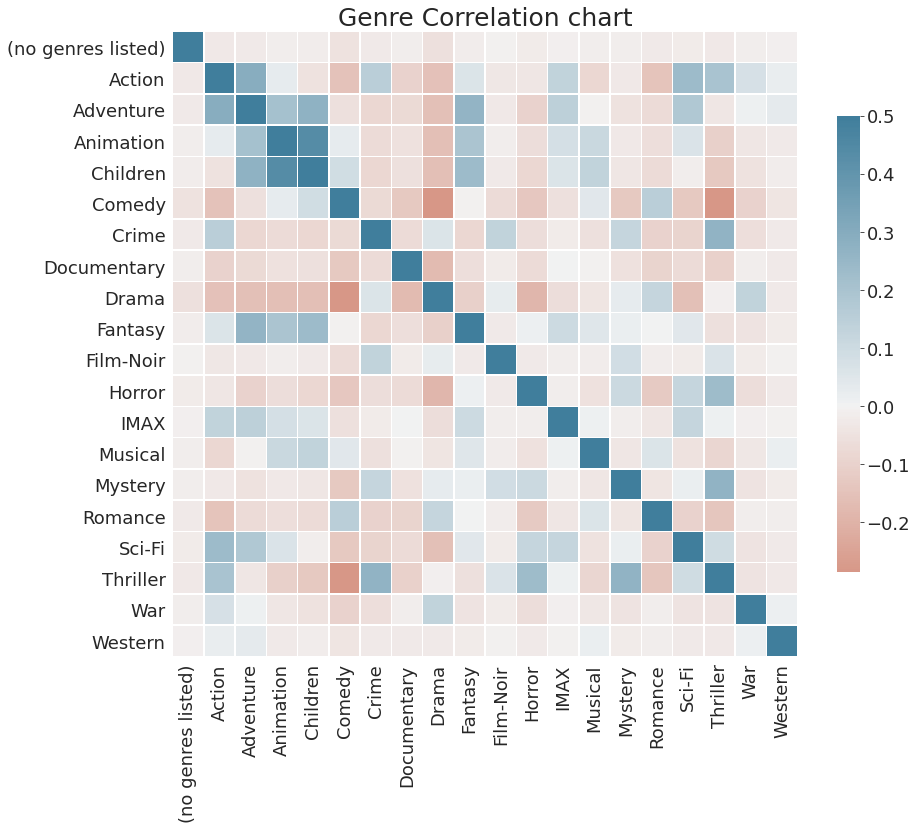

In [ ]:
#Initialize plot
fig, ax = plt.subplots(figsize = (14, 12))

#Create diverging color map
cmap = sns.diverging_palette(20, 230, as_cmap=True)

#Plot heat map
sns.heatmap(genre_correlation, vmax=0.5, center=0, cmap = cmap, square = True, linewidths=.5, cbar_kws={"shrink": .7})

#Title and fonts
plt.title("Genre Correlation chart", fontsize = 25)

#Change x and y axis fonts
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

#Change colorbar font
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)

plt.show()

### Highest rated genres

I calculate the means so I can include them on the plot

In [ ]:
genre_means = movie_ratings.groupby('primary_genre')['rating'].mean()
genre_means

primary_genre
(no genres listed)    3.421053
Action                3.447980
Adventure             3.566180
Animation             3.577708
Children              3.153553
Comedy                3.393996
Crime                 3.834317
Documentary           3.829557
Drama                 3.647231
Fantasy               3.496825
Film-Noir             4.080357
Horror                3.039821
Musical               3.652985
Mystery               3.855533
Romance               3.104000
Sci-Fi                3.467742
Thriller              3.426752
War                   3.555556
Western               3.658940
Name: rating, dtype: float64

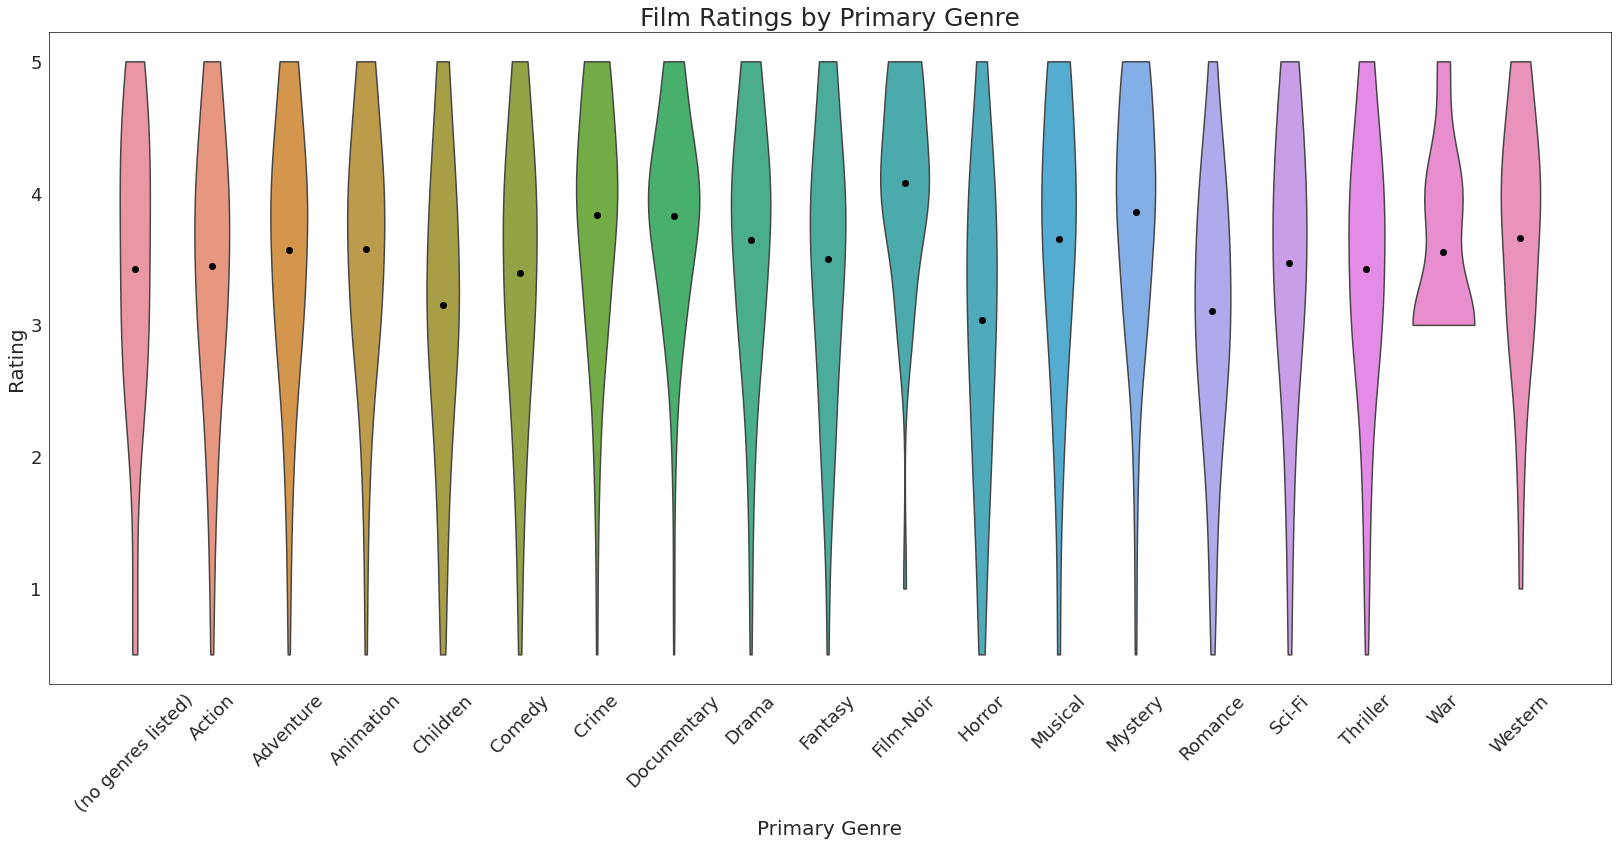

In [ ]:
#Initialize plot
fig, ax = plt.subplots(figsize = (28, 12))

#Set style
sns.set_style("white")

#Create violin plot
sns.violinplot(data=movie_ratings, x = 'primary_genre', y = 'rating', bw = 0.5, cut = 0,
               order = genre_means.index, inner = None)
#Plot means
plt.scatter(x=range(len(genre_means)),y=genre_means,c="k")

#Titles and font sizes
plt.title('Film Ratings by Primary Genre', fontsize = 25)
plt.ylabel('Rating', fontsize = 20)
plt.xlabel('Primary Genre', fontsize = 20)

#Label fontsize and rotation
plt.xticks(rotation = 45, fontsize = 18)
plt.yticks(fontsize = 18)

plt.show()

### Opinions over time

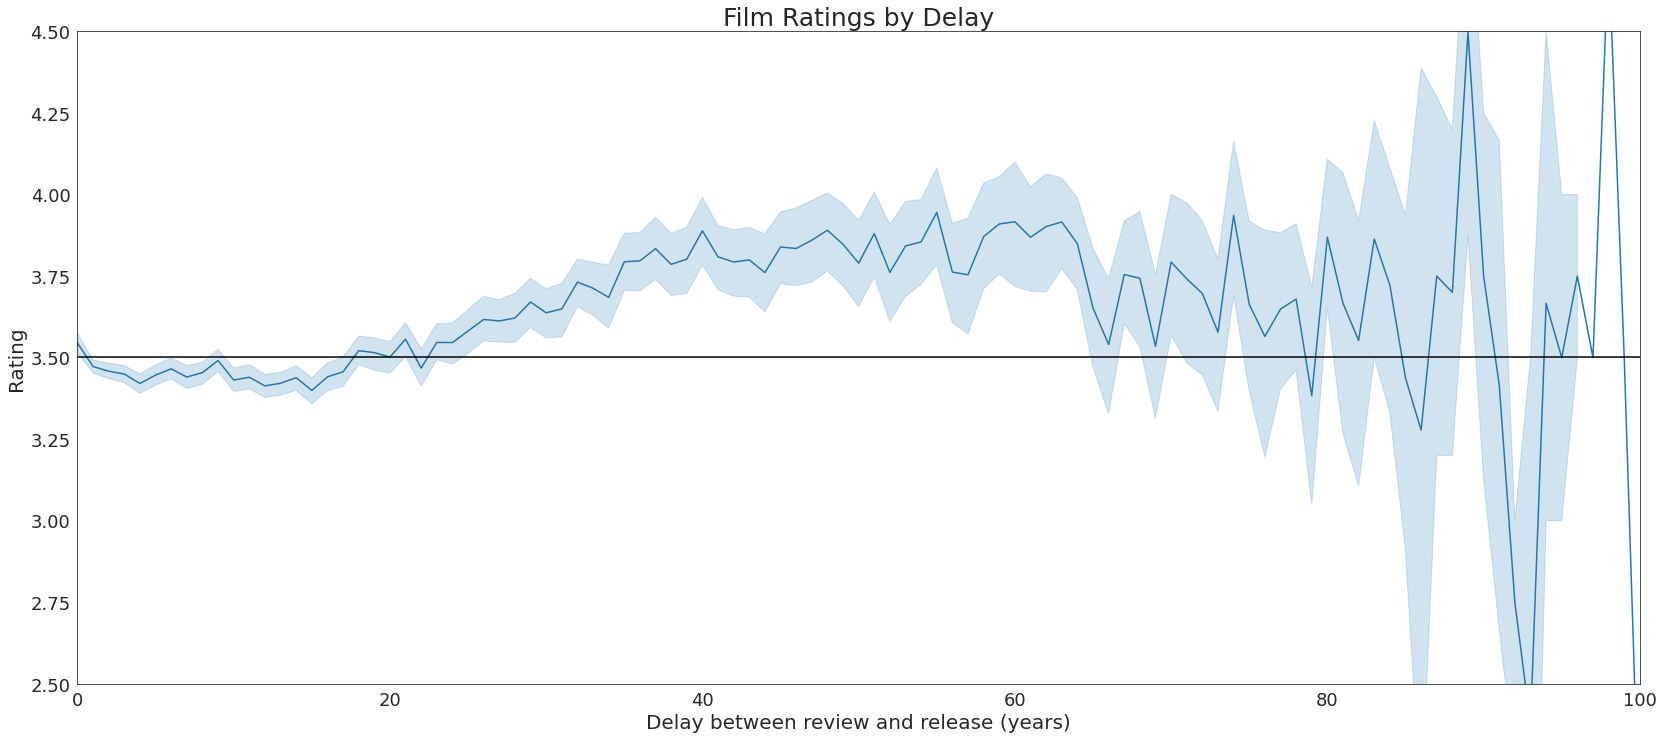

In [ ]:
#Create violin plot
fig, ax = plt.subplots(figsize = (28, 12))
sns.lineplot(data=movie_ratings, x = 'rating_delay', y = 'rating')
plt.axhline(movie_ratings['rating'].mean(), color = 'black')

#Axis limits
plt.xlim(0, 100)
plt.ylim(2.5, 4.5)

#Titles and font sizes
plt.title('Film Ratings by Delay', fontsize = 25)
plt.ylabel('Rating', fontsize = 20)
plt.xlabel('Delay between review and release (years)', fontsize = 20)

#Label fontsize and rotation
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.show()

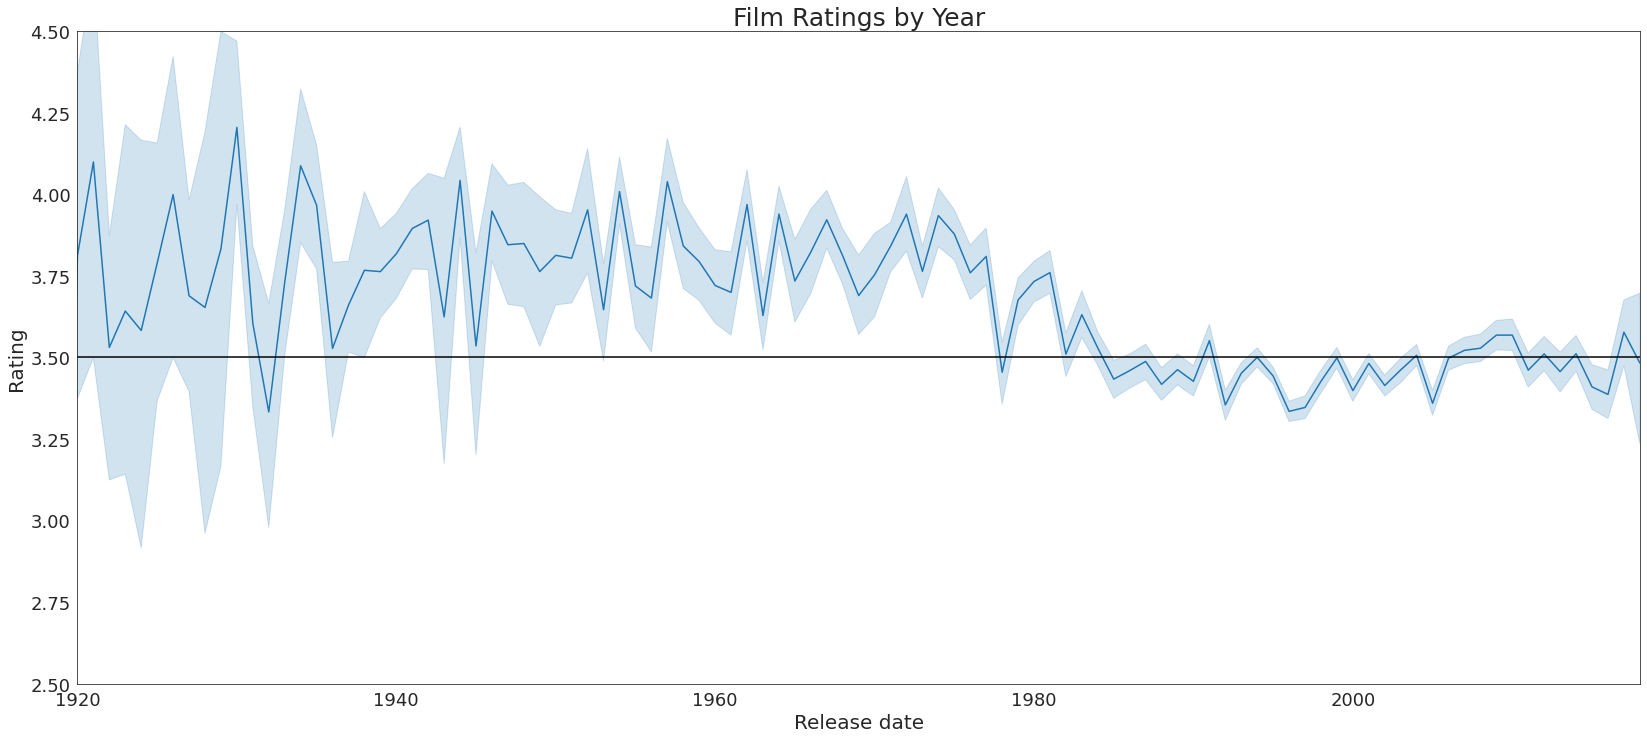

In [ ]:
#Create violin plot
fig, ax = plt.subplots(figsize = (28, 12))
sns.lineplot(data=movie_ratings, x = 'year_movie', y = 'rating')
plt.axhline(movie_ratings['rating'].mean(), color = 'black')

#Axis limits
plt.xlim(1920, 2018)
plt.ylim(2.5, 4.5)

#Titles and font sizes
plt.title('Film Ratings by Year', fontsize = 25)
plt.ylabel('Rating', fontsize = 20)
plt.xlabel('Release date', fontsize = 20)

#Label fontsize and rotation
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.show()

plt.show()